In [1]:
from kohonen import Kohonen
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
def prewitt_filter (img):
#img = cv2.imread('1.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    img_res = []
    img_res.append(gray)
    img_res.append(img_prewittx)
    img_res.append(img_prewitty)
    #img_res = np.array(img_res)
    
    return img_res

# img_canny = cv2.Canny(img,100,200)
# b, g, r = cv2.split(img)
# b = cv2.Canny(b,100,200)
# g = cv2.Canny(g,100,200)

In [3]:
# i1 = prewitt_filter(cv2.imread('1.png'))

In [4]:
# len(i1)

In [5]:
# from scipy import ndimage, misc
# b, g, r = cv2.split(img)
# b = cv2.Canny(b,100,200)
# g = cv2.Canny(g,100,200)
# r = cv2.Canny(r,100,200) 
    
# fig = plt.figure()
# plt.gray()  # show the filtered result in grayscale
# ax1 = fig.add_subplot(121)  # left side
# ax2 = fig.add_subplot(122)  # right side
# ascent = gray #misc.ascent()
# result = ndimage.prewitt(ascent)
# ax1.imshow(img_prewittx)
# ax2.imshow(i1[2])
# plt.show()

In [6]:
# def Canny_fnc(img):
#     im = []
#     b, g, r = cv2.split(img)
#     b = cv2.Canny(b,100,200)
#     im.append(b)
#     g = cv2.Canny(g,100,200)
#     im.append(g)
#     r = cv2.Canny(r,100,200)    
#     im.append(r)
#     return im

In [7]:
VEC_LEN = 10800
DECAY_RATE = 0.95
MIN_ALPHA = 0.01
RADIUS_REDUCTION_POINT = 0.023  # Last 20% of iterations.

In [8]:
weights = {}
number_of_clusters = 13

for i in range(number_of_clusters):
    weight_list = np.zeros((10800), np.float32)

    weight_list[:] = [random.uniform(0.1, 0.9) for i in range(10800)]

    weights.update({i: weight_list})
weights

{0: array([0.39608142, 0.2918234 , 0.66152066, ..., 0.62258923, 0.5932278 ,
        0.32275203], dtype=float32),
 1: array([0.6941007 , 0.36786336, 0.29896066, ..., 0.47153816, 0.47625512,
        0.28580722], dtype=float32),
 2: array([0.41376624, 0.3658618 , 0.6629171 , ..., 0.50469047, 0.19742489,
        0.59191537], dtype=float32),
 3: array([0.2169668 , 0.7239803 , 0.76001835, ..., 0.5618402 , 0.1848762 ,
        0.74026996], dtype=float32),
 4: array([0.20809512, 0.43611297, 0.662035  , ..., 0.31499314, 0.1412833 ,
        0.15564346], dtype=float32),
 5: array([0.40954602, 0.76717895, 0.7105969 , ..., 0.6295521 , 0.73992914,
        0.64764893], dtype=float32),
 6: array([0.30173334, 0.86261606, 0.60011595, ..., 0.529036  , 0.2991836 ,
        0.2700052 ], dtype=float32),
 7: array([0.30509034, 0.68566126, 0.6906822 , ..., 0.309034  , 0.3989637 ,
        0.5409494 ], dtype=float32),
 8: array([0.61596864, 0.22123   , 0.42486715, ..., 0.70459527, 0.7171474 ,
        0.485423  ],

In [9]:
path = "./IMG/mix"
# path = "./IMG/test"
files = [ f for f in listdir(path) if isfile(join(path,f)) ]
images = np.empty(len(files), dtype=object)

for n in range(0, len(files)):
    image = cv2.imread(join(path, files[n]))
    image = cv2.resize(image, (60, 60)) 
    img = np.array(prewitt_filter(image)) / 255
    images[n] = np.array(img).flatten()#np.array(img_canny).flatten()
# images

In [10]:
clusters = []
names = []

centres = weights
for name in centres:
    clusters.append(centres[name])
    names.append(name)
clusters

[array([0.39608142, 0.2918234 , 0.66152066, ..., 0.62258923, 0.5932278 ,
        0.32275203], dtype=float32),
 array([0.6941007 , 0.36786336, 0.29896066, ..., 0.47153816, 0.47625512,
        0.28580722], dtype=float32),
 array([0.41376624, 0.3658618 , 0.6629171 , ..., 0.50469047, 0.19742489,
        0.59191537], dtype=float32),
 array([0.2169668 , 0.7239803 , 0.76001835, ..., 0.5618402 , 0.1848762 ,
        0.74026996], dtype=float32),
 array([0.20809512, 0.43611297, 0.662035  , ..., 0.31499314, 0.1412833 ,
        0.15564346], dtype=float32),
 array([0.40954602, 0.76717895, 0.7105969 , ..., 0.6295521 , 0.73992914,
        0.64764893], dtype=float32),
 array([0.30173334, 0.86261606, 0.60011595, ..., 0.529036  , 0.2991836 ,
        0.2700052 ], dtype=float32),
 array([0.30509034, 0.68566126, 0.6906822 , ..., 0.309034  , 0.3989637 ,
        0.5409494 ], dtype=float32),
 array([0.61596864, 0.22123   , 0.42486715, ..., 0.70459527, 0.7171474 ,
        0.485423  ], dtype=float32),
 array([0.

Epoch: 1 | Progress: 100% | Alpha: 0.6 | Eps: 0.01
Epoch: 2 | Progress: 100% | Alpha: 0.57 | Eps: 0.01
Epoch: 3 | Progress: 100% | Alpha: 0.5415 | Eps: 0.01
Epoch: 4 | Progress: 100% | Alpha: 0.5144 | Eps: 0.01
Epoch: 5 | Progress: 100% | Alpha: 0.4887 | Eps: 0.01
Epoch: 6 | Progress: 100% | Alpha: 0.4643 | Eps: 0.01
Epoch: 7 | Progress: 100% | Alpha: 0.4411 | Eps: 0.01
Epoch: 8 | Progress: 100% | Alpha: 0.419 | Eps: 0.01
Epoch: 9 | Progress: 100% | Alpha: 0.3981 | Eps: 0.01
Epoch: 10 | Progress: 100% | Alpha: 0.3781 | Eps: 0.01
Epoch: 11 | Progress: 100% | Alpha: 0.3592 | Eps: 0.01
Epoch: 12 | Progress: 100% | Alpha: 0.3413 | Eps: 0.01
Epoch: 13 | Progress: 100% | Alpha: 0.3242 | Eps: 0.01
Epoch: 14 | Progress: 100% | Alpha: 0.308 | Eps: 0.01
Epoch: 15 | Progress: 100% | Alpha: 0.2926 | Eps: 0.01
Epoch: 16 | Progress: 100% | Alpha: 0.278 | Eps: 0.01
Epoch: 17 | Progress: 100% | Alpha: 0.2641 | Eps: 0.01
Epoch: 18 | Progress: 100% | Alpha: 0.2509 | Eps: 0.01
Epoch: 19 | Progress: 100% 

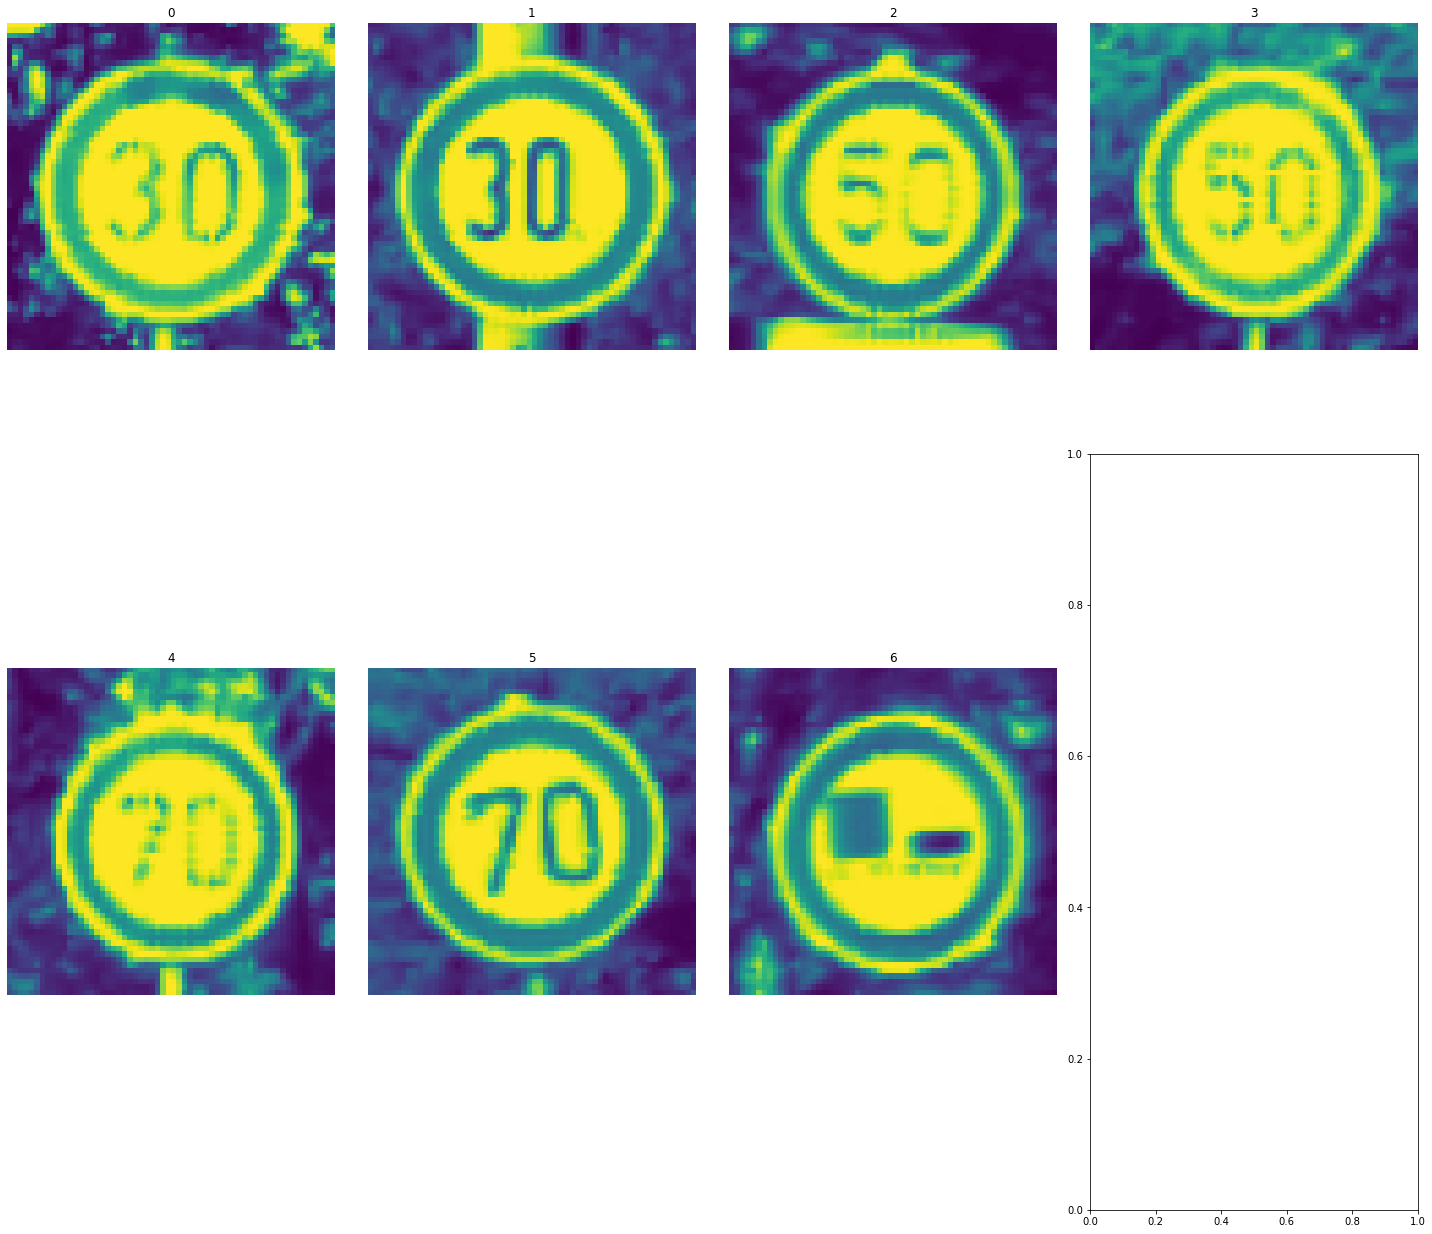

CLUSTER: 1


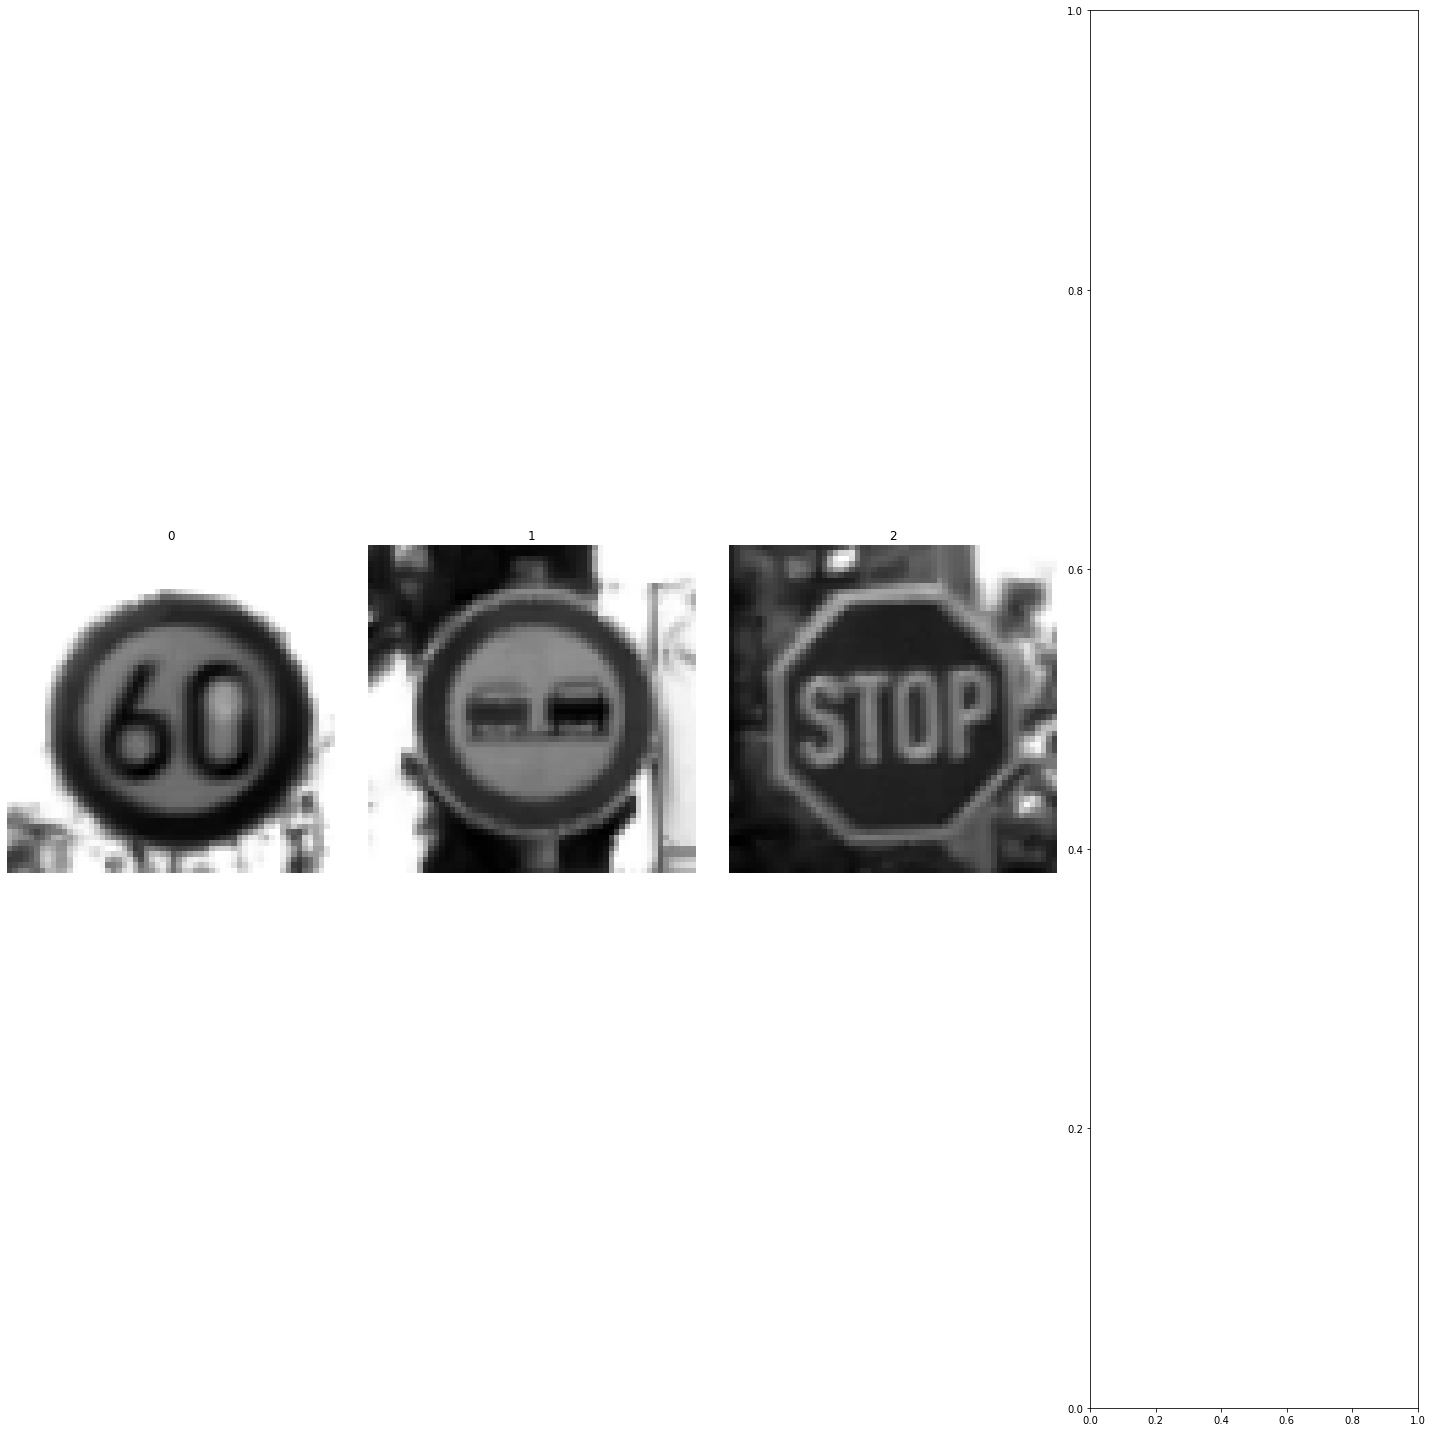

CLUSTER: 2


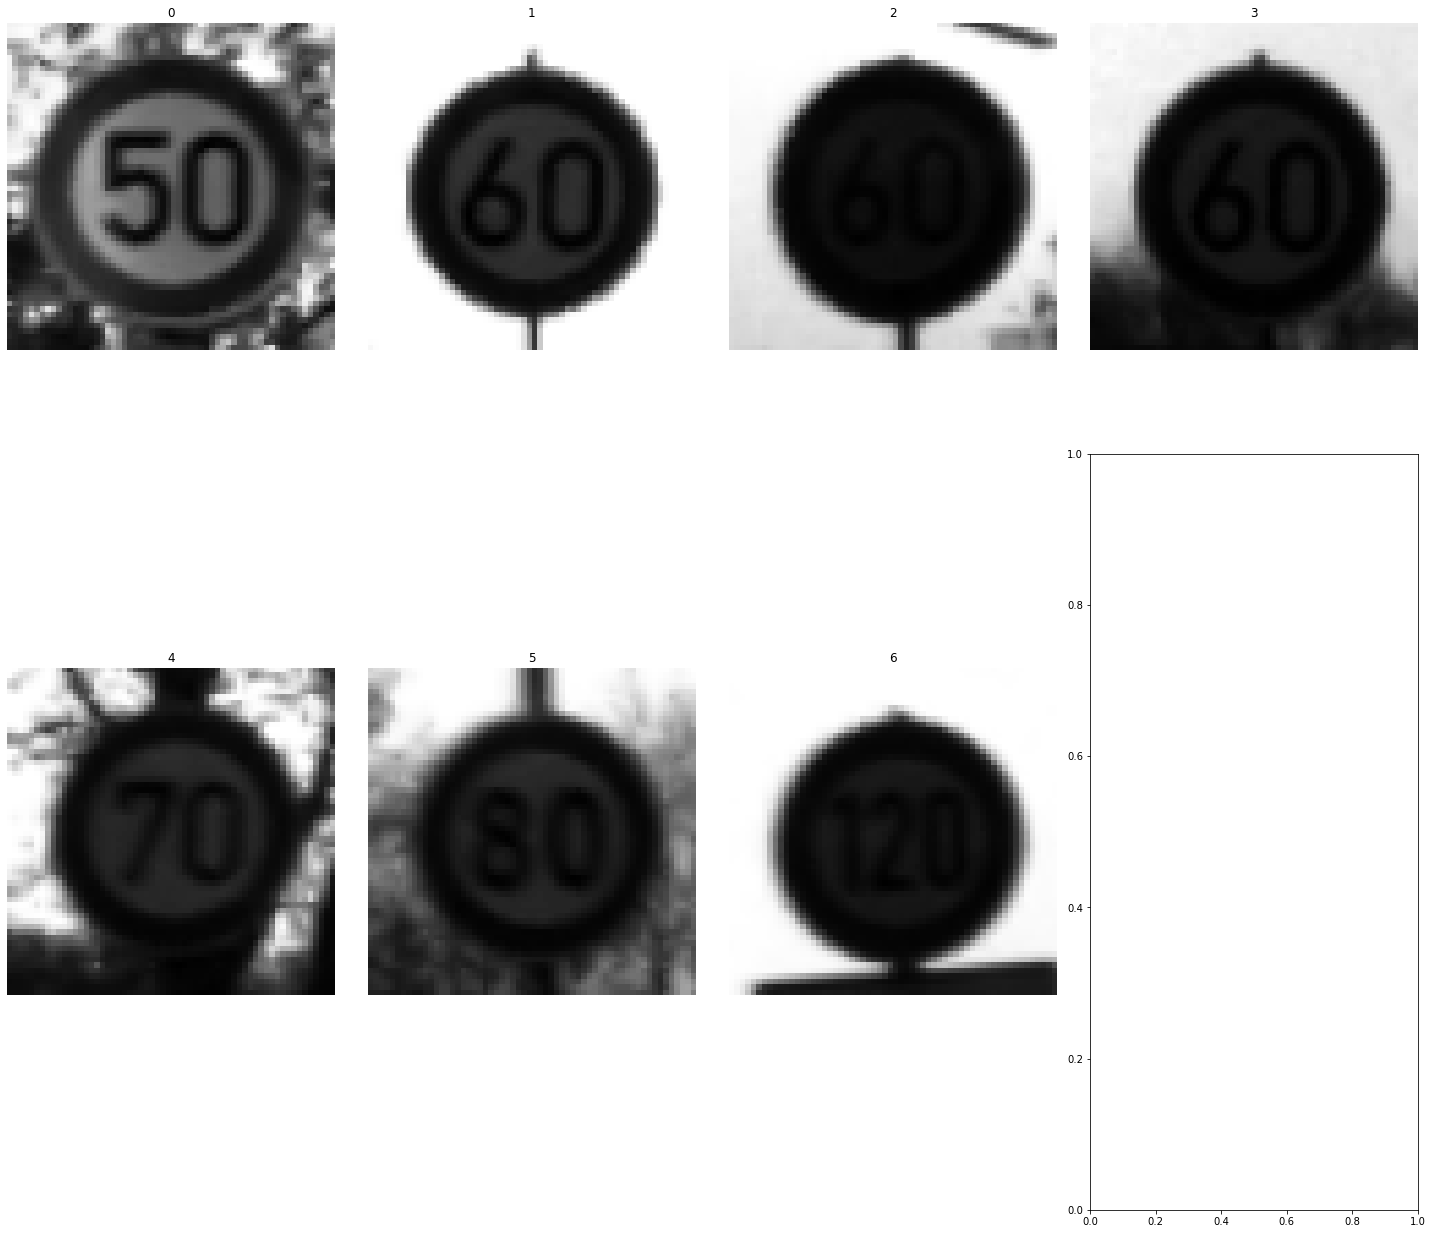

CLUSTER: 3


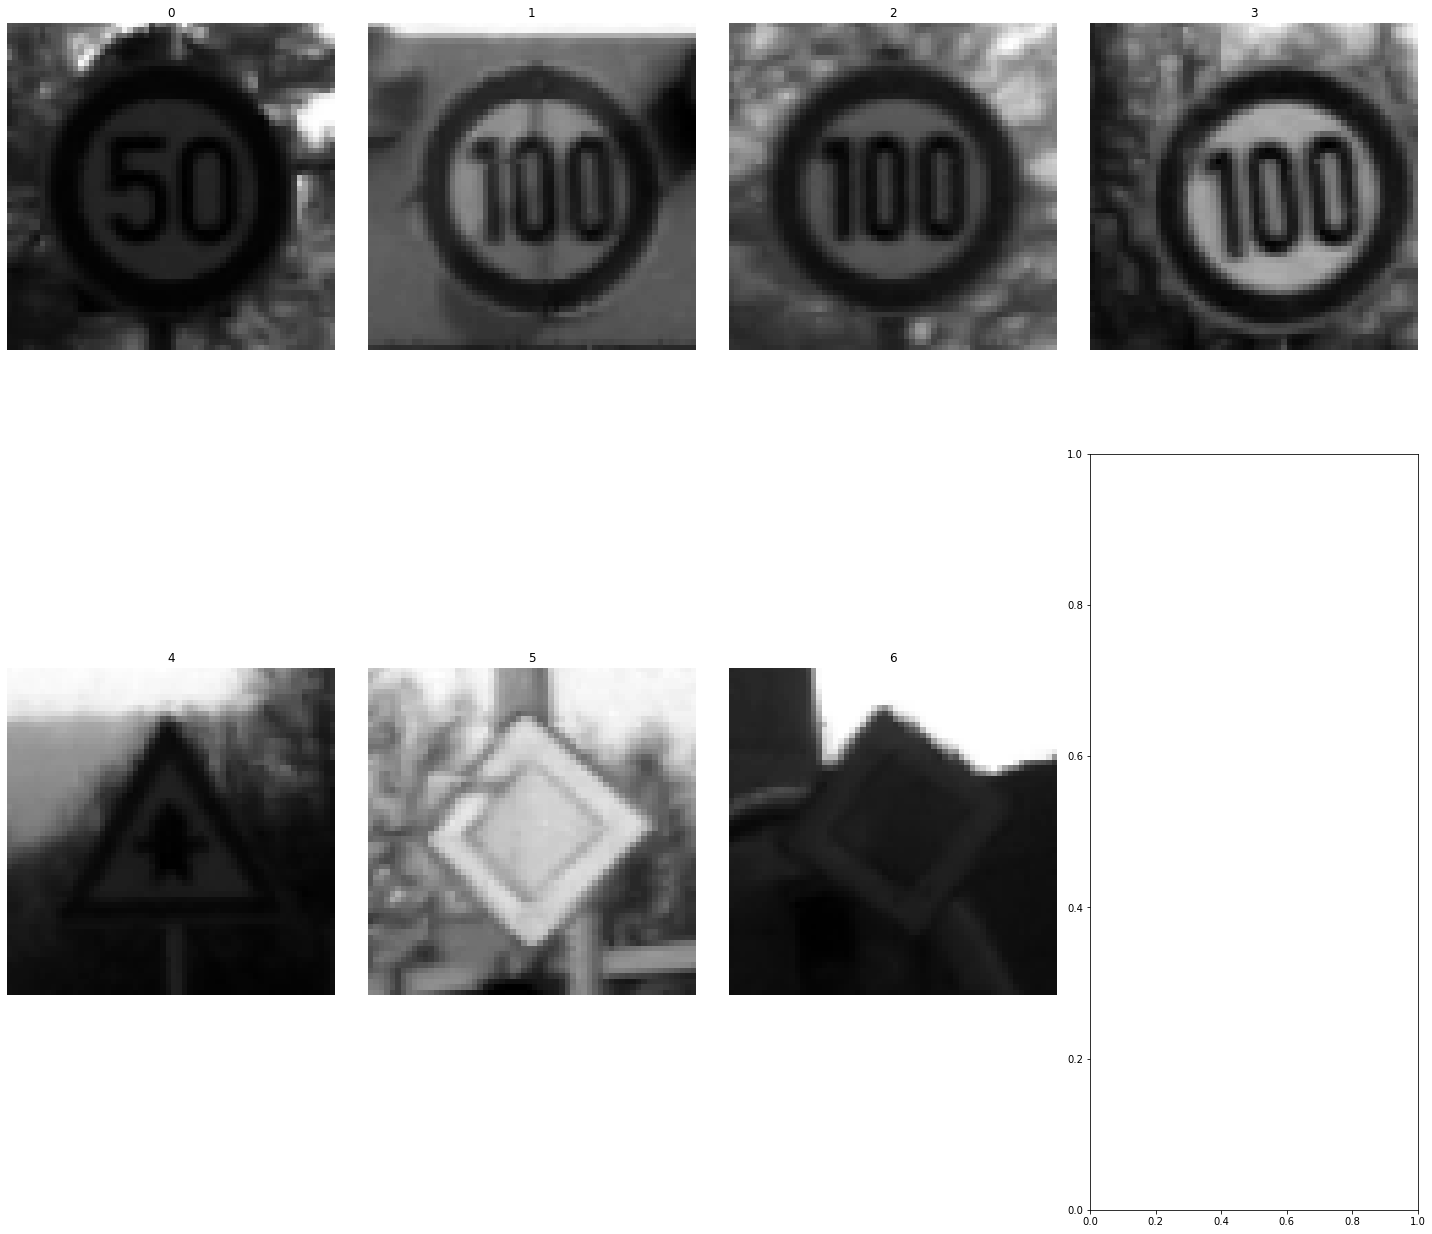

CLUSTER: 4


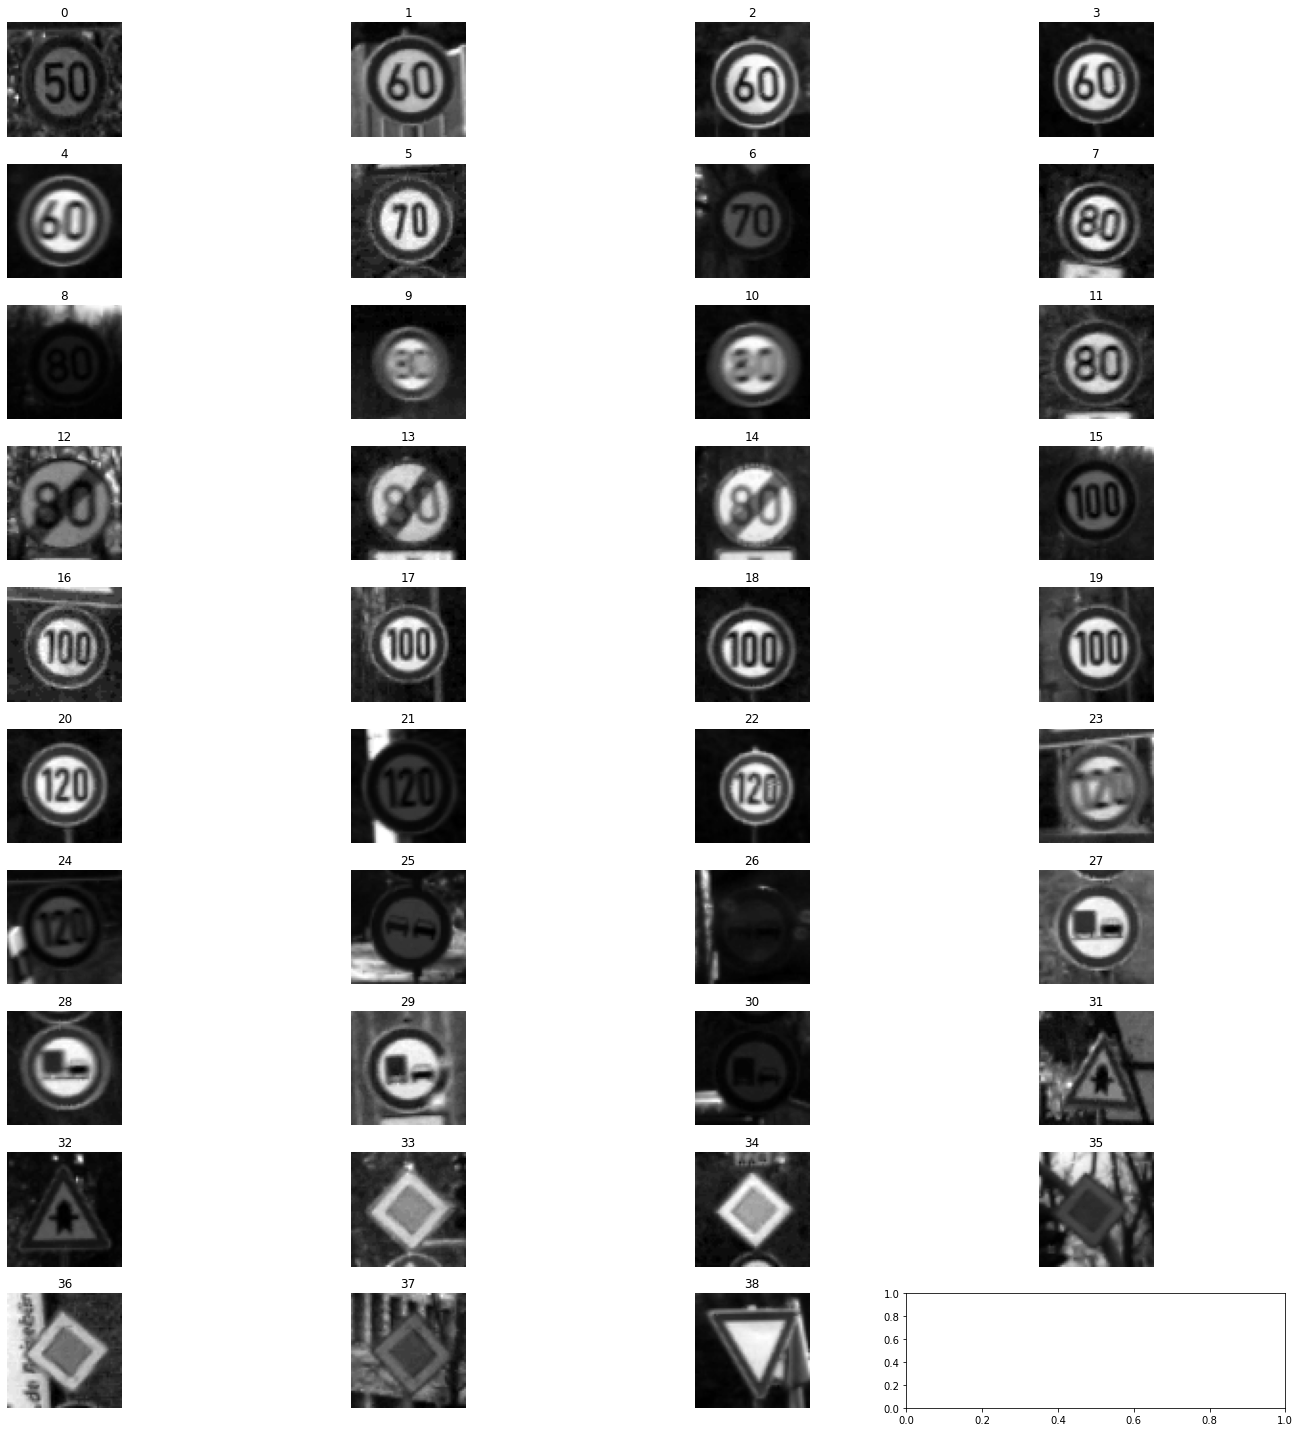

CLUSTER: 5


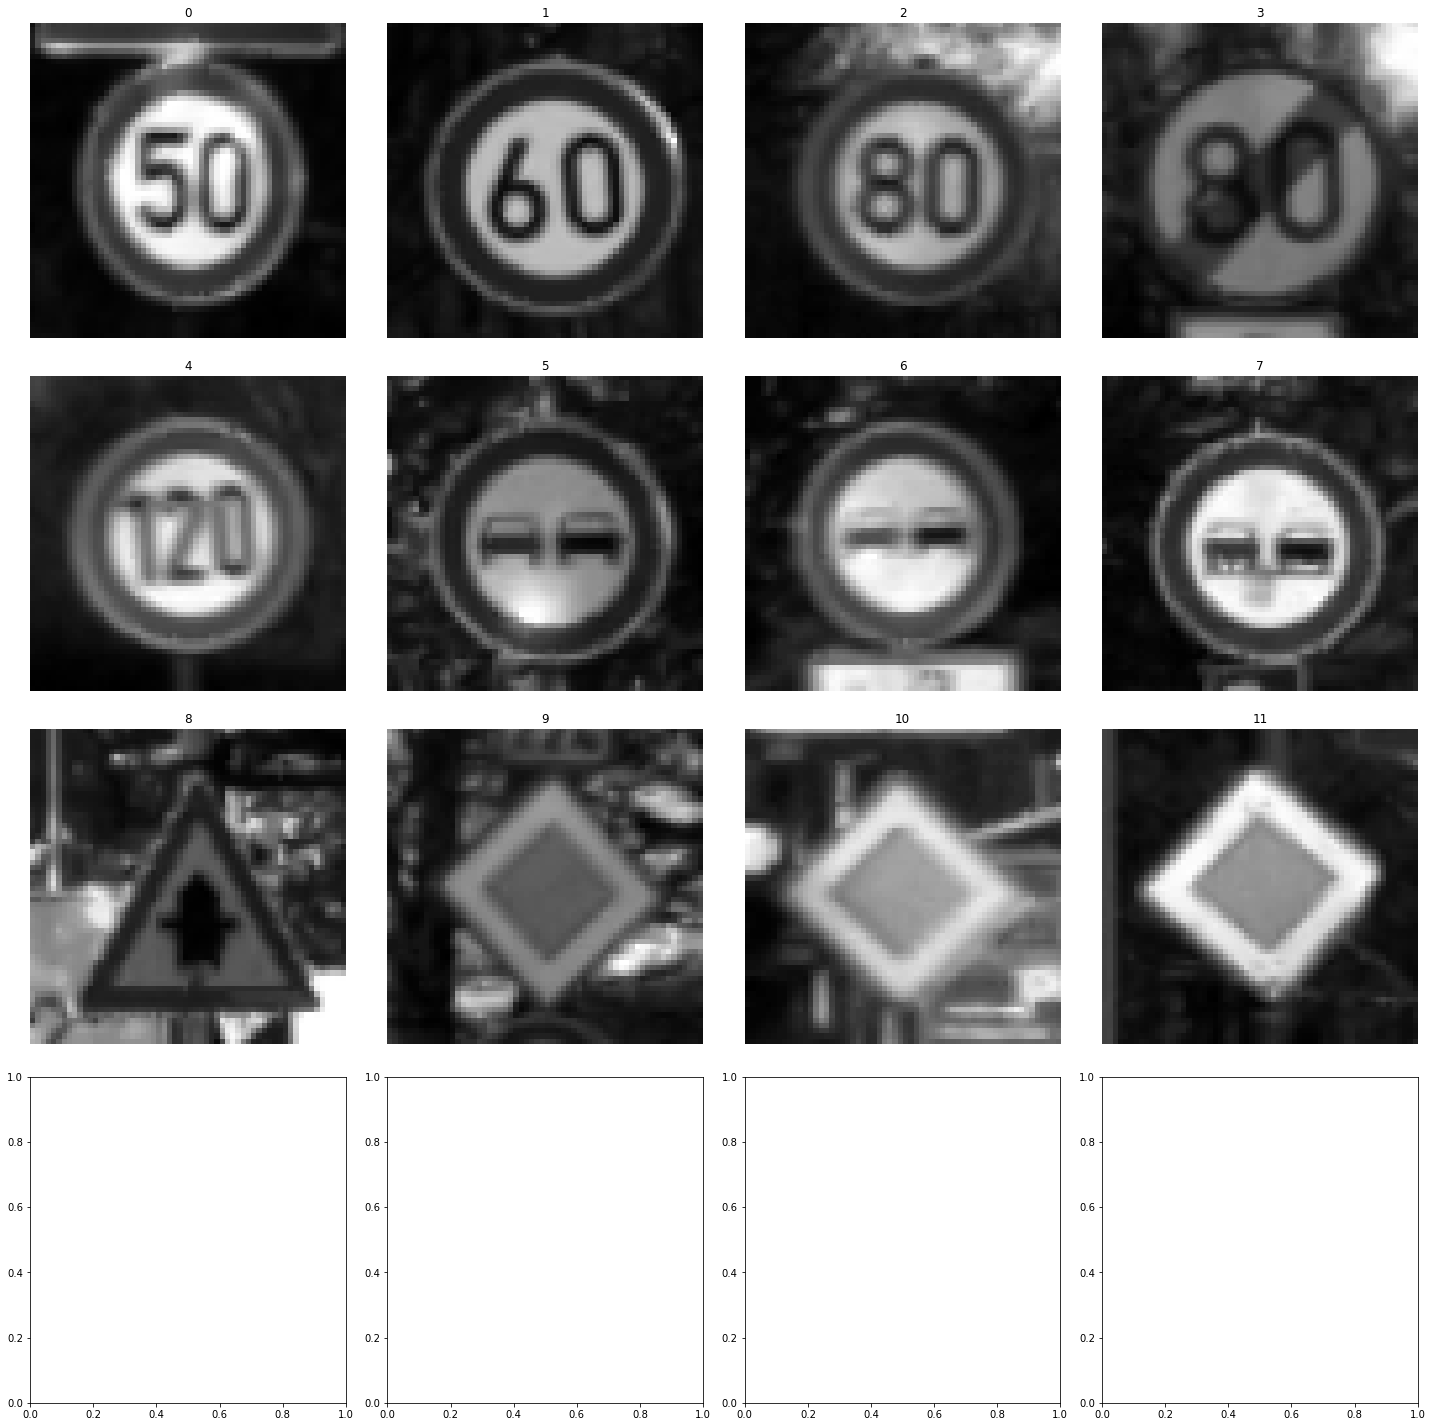

CLUSTER: 6


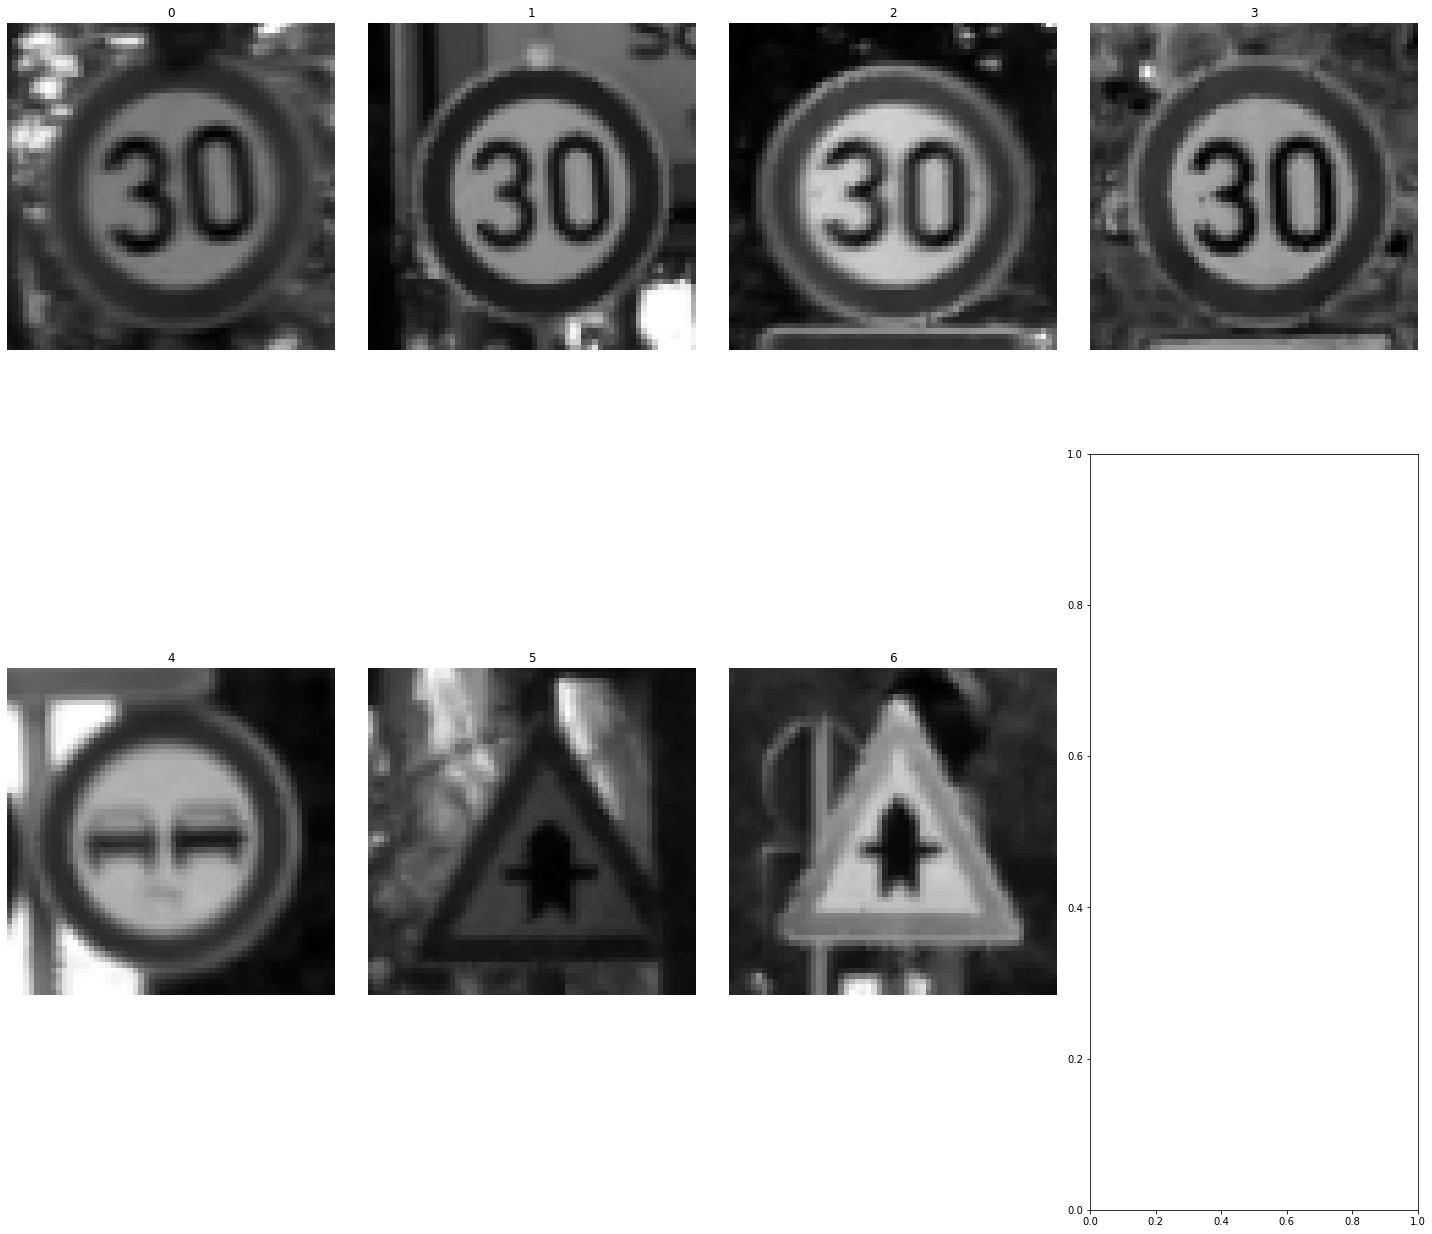

CLUSTER: 7


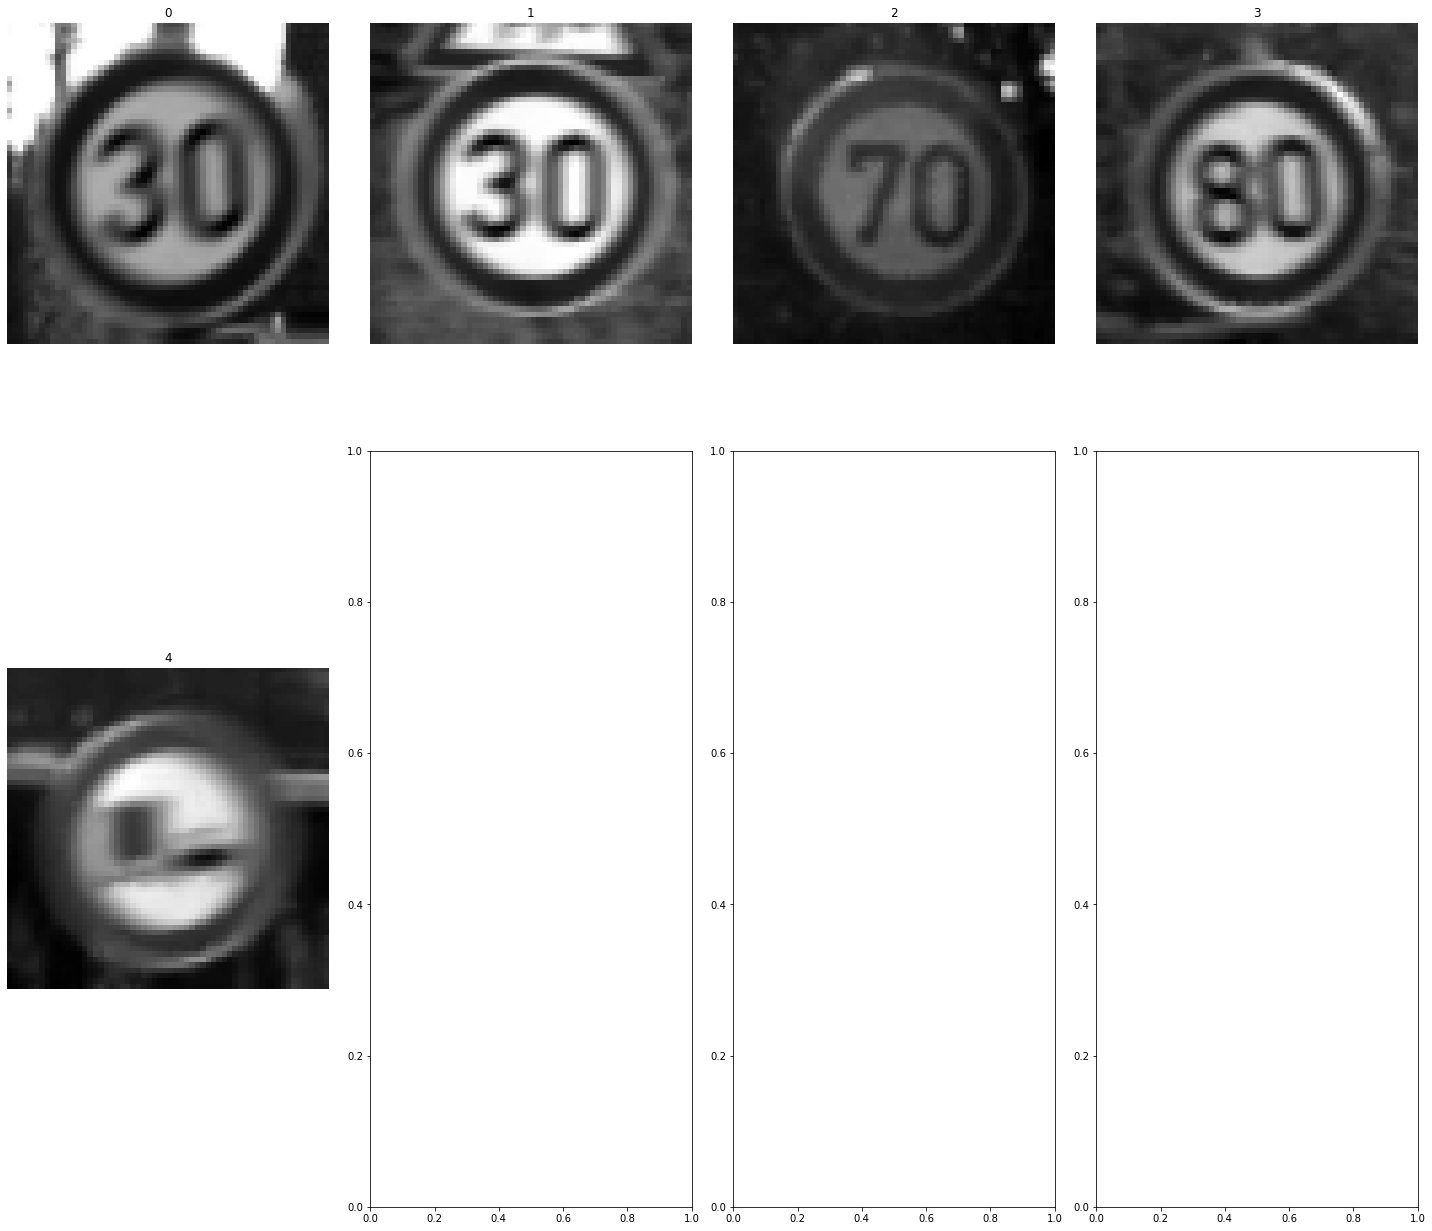

CLUSTER: 8


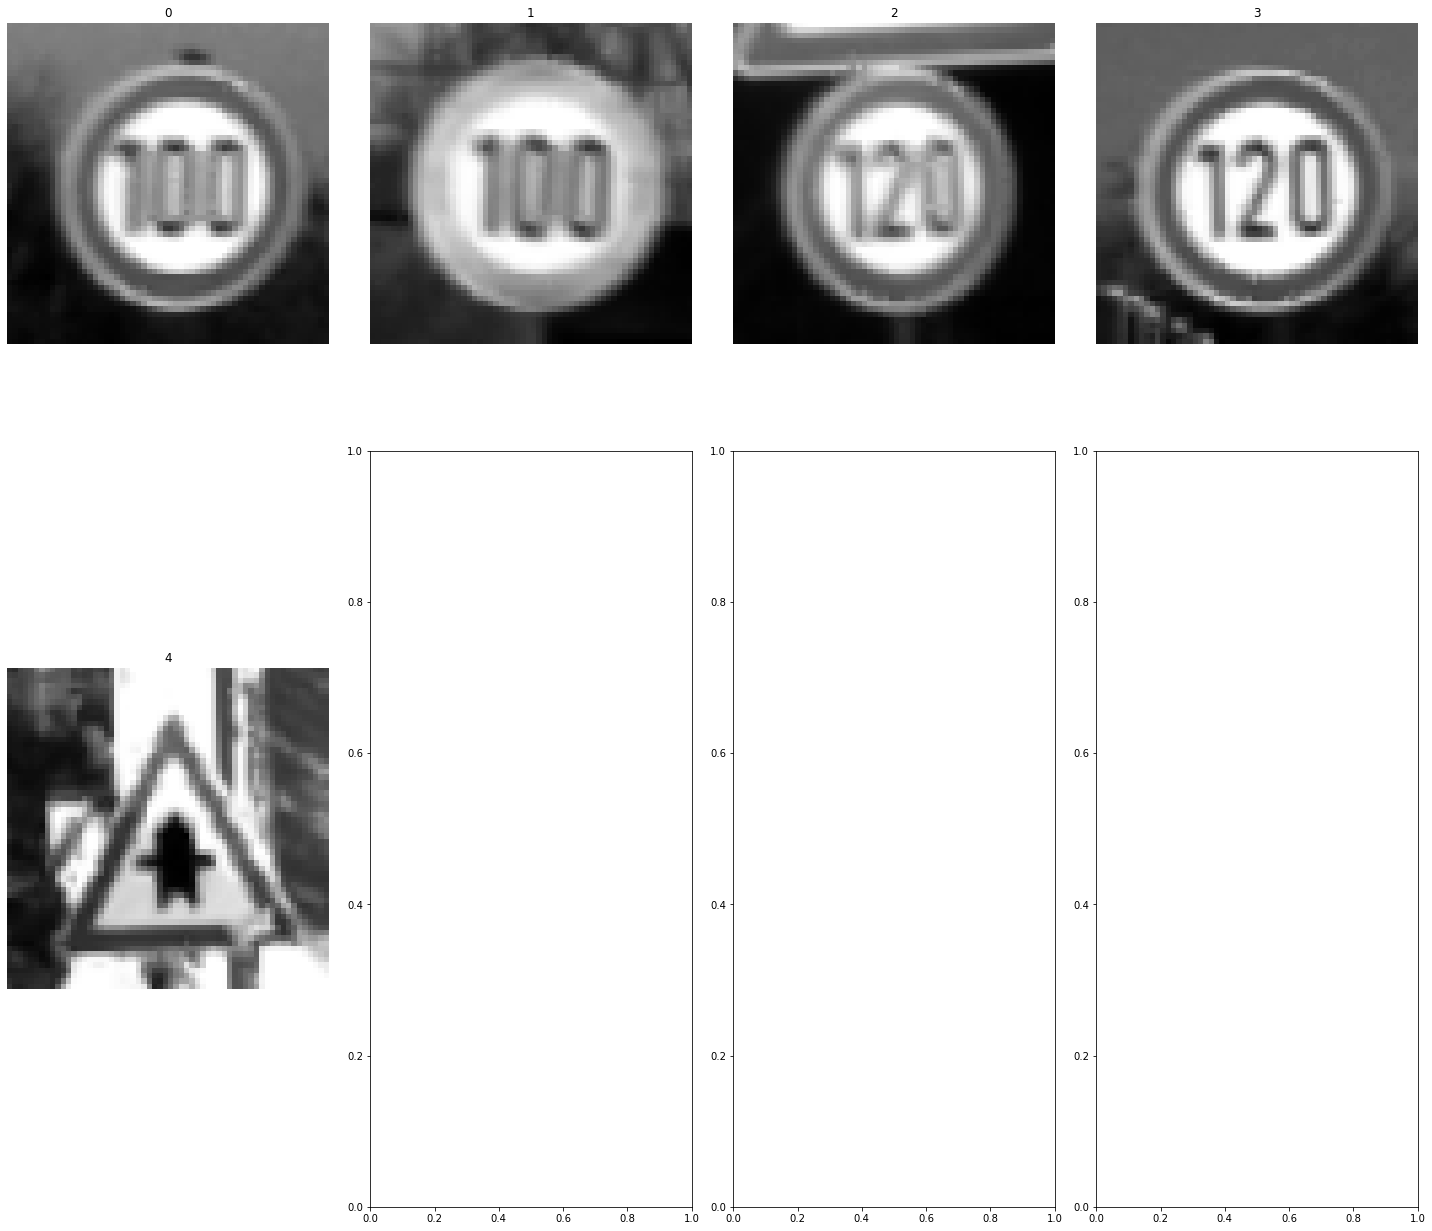

CLUSTER: 9


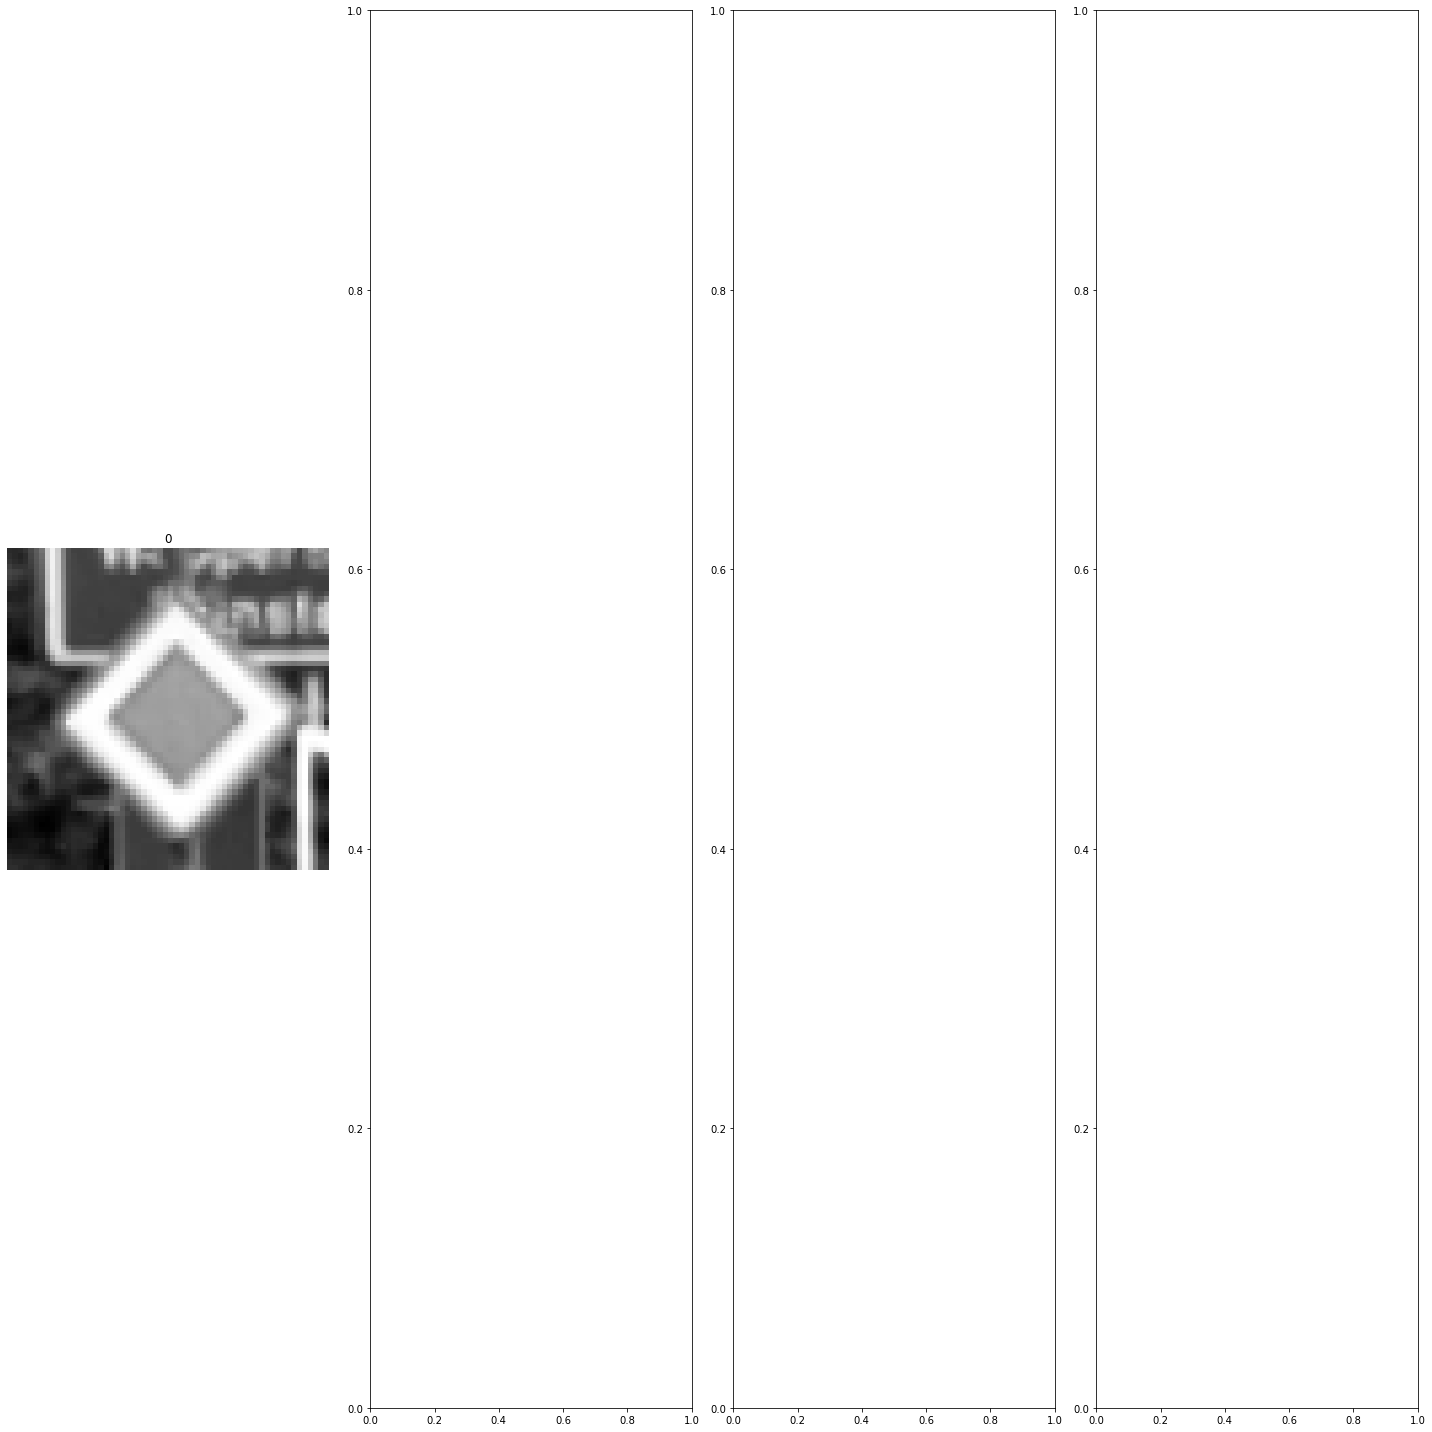

CLUSTER: 10


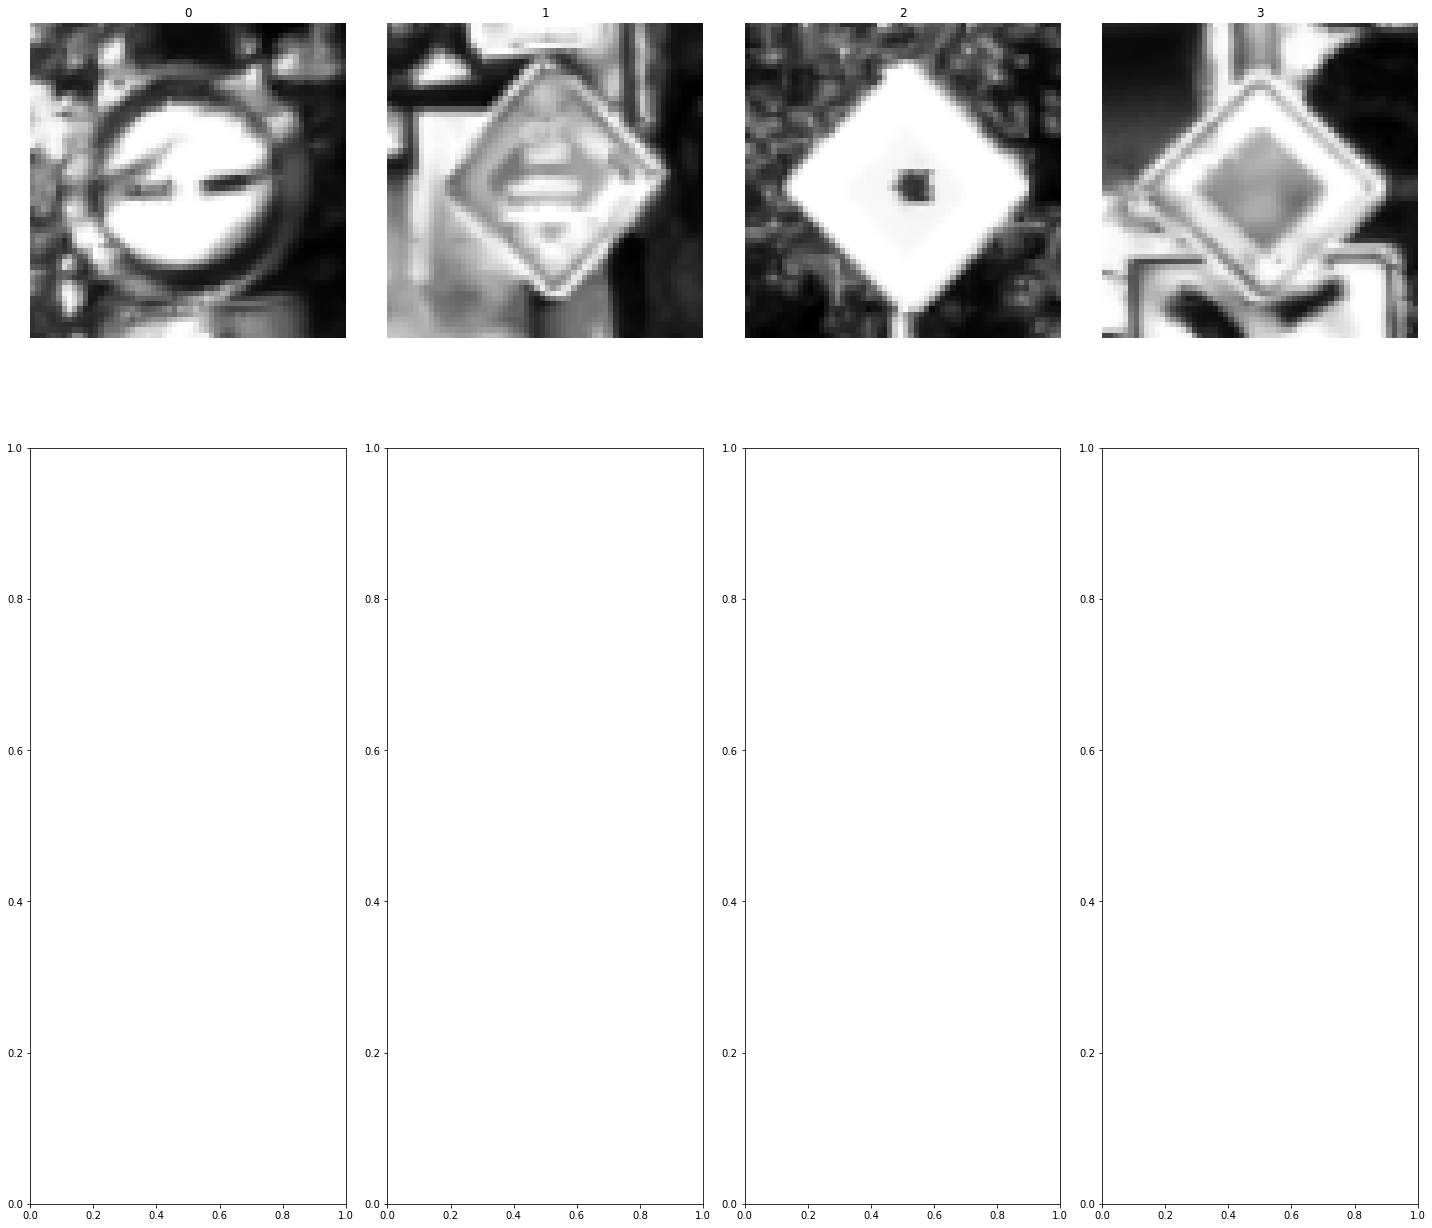

CLUSTER: 11


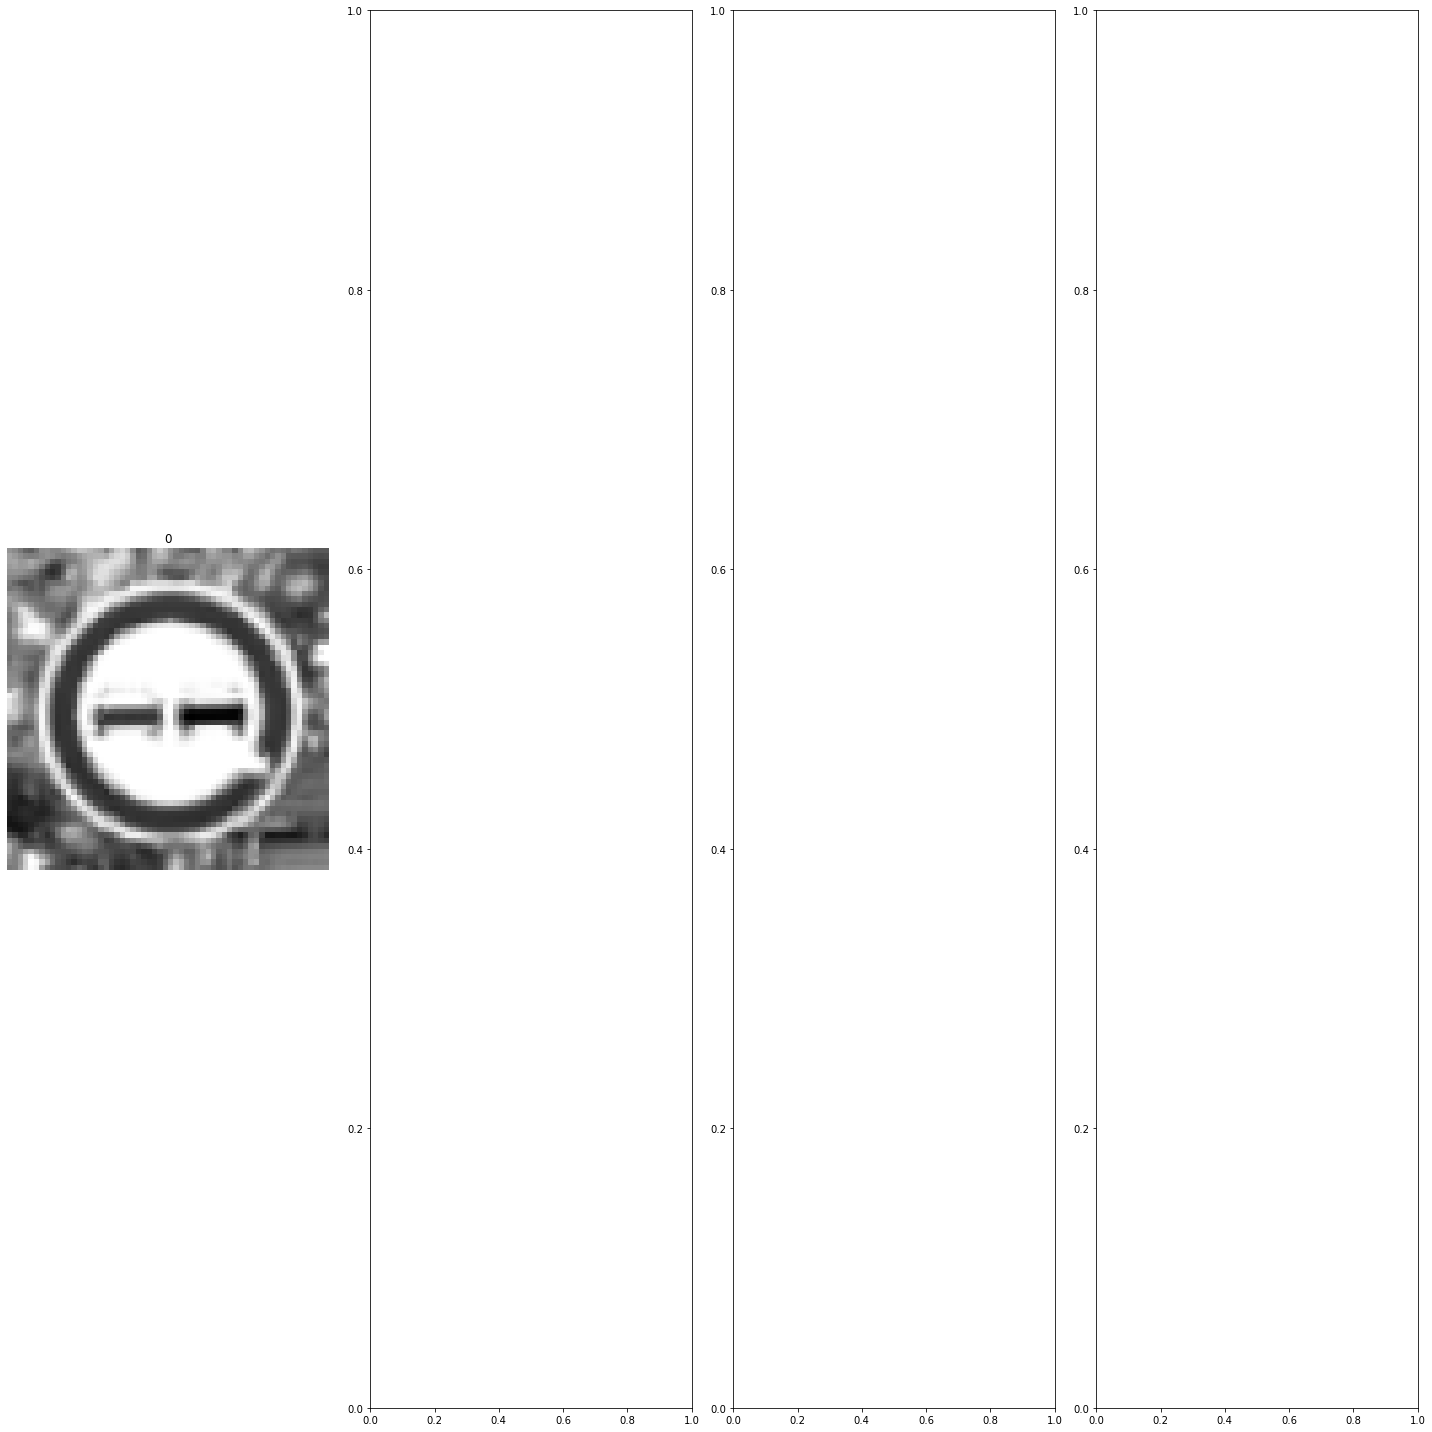

CLUSTER: 12


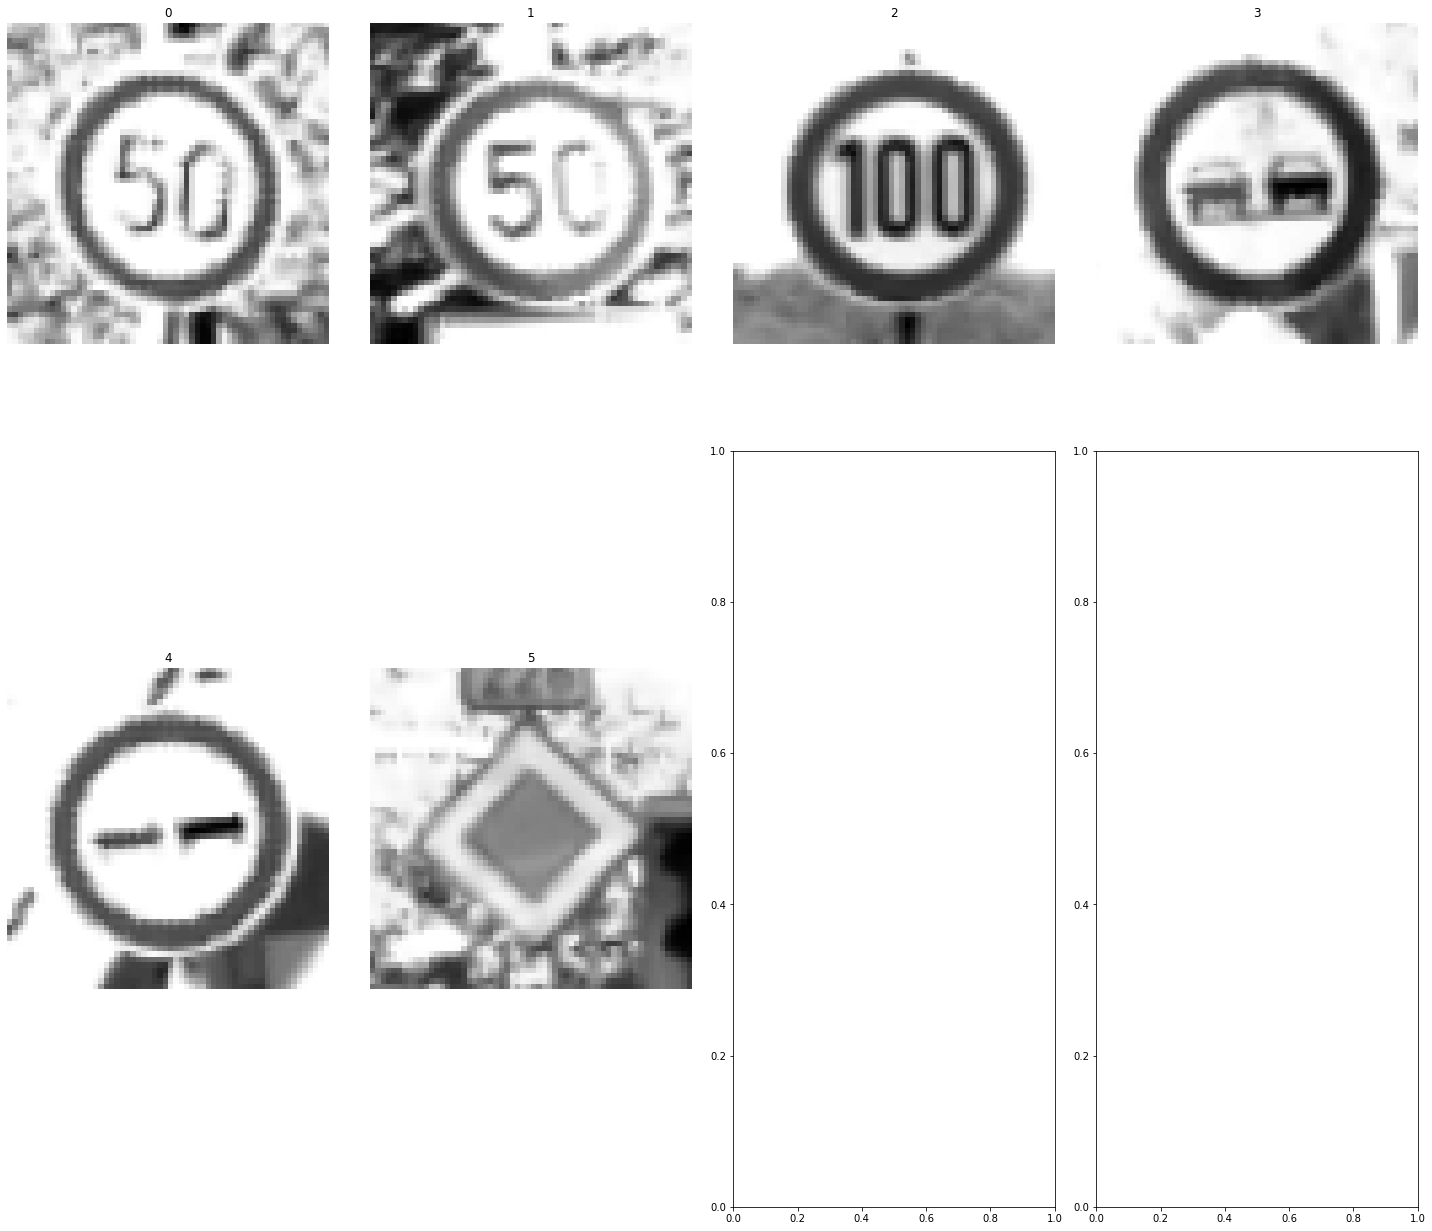

In [11]:
from kohonen import Kohonen

total_number = len(images)
vectors = []

kohonen = Kohonen(VEC_LEN, len(clusters), len(images), MIN_ALPHA, DECAY_RATE, RADIUS_REDUCTION_POINT, clusters, vectors, names)
kohonen.training(images)
result = kohonen.print_results(images)


plt.rcParams["figure.figsize"] = (20, 20)

def display_multiple_img(images, rows, cols):
    figure, ax = plt.subplots(nrows=rows, ncols=cols)
    for i in range(len(images)):
        ax.ravel()[i].imshow(images[i])
        ax.ravel()[i].set_title(i)
        ax.ravel()[i].set_axis_off()
    plt.gray()
    plt.tight_layout()
    plt.show()

cols = 4
for i, _ in enumerate(clusters):
    print("CLUSTER: " + str(i))
    rows = int(len(result[i]) / cols) + 1
    processed_images =  [img[0:3600].reshape(60, 60, 1) for img in result[i]]
#     processed_images = [image_decode(img, params[k]) for k, img in enumerate(images)]
    if(len(processed_images) > 0):
        display_multiple_img(processed_images, rows, cols)
    else:
        print("cluster is empty")

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>